In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
pwd

In [ ]:
cd gdrive/MyDrive/dataset/

In [ ]:
!pip install transformers
!pip install sentence-transformers

In [ ]:
import os 
import numpy as np
import pandas as pd
import csv
import nltk
import re
import transformers
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from transformers import AutoTokenizer, AutoModel
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from sklearn.preprocessing import LabelEncoder 
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
nltk.download('punkt')

In [ ]:
def csvfile_read(filename):
    #return a list that is contain the list of input file data with 2 arguman: text and lable
    read_file=[]
    with open(filename,'r',newline='',encoding="utf-8", errors='ignore') as myFile:
        reader = csv.reader(myFile)
        for row in reader:
            read_file.append(row)
    return read_file

def csvfile_write(filename,data):
    myFile = open(filename, 'w',newline='')
    with myFile:
        writer = csv.writer(myFile)
        writer.writerows(data)


In [ ]:
def list_to_str(string):
    newstr = ""
    for element in string:
        newstr += element + " "
    return newstr

In [ ]:
def remove_stop_words(sentense):
    text_tokens = word_tokenize(sentense)
    sentense = [word for word in text_tokens if not word in stop_words]
    return sentense

In [ ]:
def remove_html_tags(sentense):
    sentense = BeautifulSoup(sentense, "html.parser")
    sentense = sentense.get_text()
    return sentense

In [ ]:
def preprocessing(text):
    all_sentecess =[]
    all_lables =[]
    for i in range(len(text)):
        text[i][0] = text[i][0].lower()

        text[i][0] = re.sub(r'\d +', '', text[i][0])
        text[i][0] = re.sub(r'\'m', ' am', text[i][0])
        text[i][0] = re.sub(r'\'re ', ' are', text[i][0])
        text[i][0] = re.sub(r'\'s ', ' is', text[i][0])
        text[i][0] = re.sub(r'\'t ', ' not', text[i][0])
        text[i][0] = re.sub(r'\'d ', ' would', text[i][0])
        text[i][0] = re.sub(r'\'ll ', ' will', text[i][0])
        text[i][0] = re.sub(r'\'ve ', ' have', text[i][0])
        
        text[i][0] = re.sub(r'\?', ' ? ', text[i][0])
        text[i][0] = re.sub(r'\,', ' ', text[i][0])
        text[i][0] = re.sub(r'\!', ' ! ', text[i][0])
        text[i][0] = re.sub(r'\*', ' ', text[i][0])
        text[i][0] = re.sub(r'\-', ' ', text[i][0])
        text[i][0] = re.sub(r'\(', ' ', text[i][0])
        text[i][0] = re.sub(r'\(', ' ', text[i][0])

        text[i][0] = re.sub('  ', ' ', text[i][0])

        # Remove html_tags
        text[i][0] = remove_html_tags(text[i][0])
        
        # Remove whitespaces
        text[i][0] = text[i][0].strip()

        # Remove stop words
        text[i][0] = remove_stop_words(text[i][0])
        text[i][0] = list_to_str(text[i][0])

        all_sentecess.append(text[i][0])
        all_lables.append(text[i][1])

    a=all_sentecess.pop(0)
    b=all_lables.pop(0)

    return all_sentecess,all_lables

In [ ]:
def bow_countVocab_train(text):
    vectorizer = CountVectorizer(min_df=0.005, max_df=0.995, max_features=150)
    X = vectorizer.fit_transform(text)
    y = vectorizer.get_feature_names()
    return X.toarray(),y

def bow_countVocab_test(text, vocabs):
    vectorizer = CountVectorizer(vocabulary=vocabs, min_df=0.005, max_df=0.995, max_features=150)
    X = vectorizer.fit_transform(text)
    return X.toarray()

def BOW(text_train,text_test):
  vector_train, vocab_train = bow_countVocab_train(text_train)
  vector_test = bow_countVocab_test(text_test, vocab_train)
  return vector_train, vector_test

In [ ]:
def BERT(comment, model):
    embeddingVectors = []
    comment = sent_tokenize(comment)
    sentence_embeddings = model.encode(comment)

    endVector = np.average(sentence_embeddings,axis= 0)
    return endVector

def BERT_Embeding(text_train,text_test):
    bert_train = []
    bert_test = []
    model = SentenceTransformer('bert-base-nli-mean-tokens')
    i = 0
    for comment in text_train:
        bert_train.append(BERT(comment, model))
        i += 1
    
    i = 0
    for comment in text_test:
        bert_test.append(BERT(comment, model))
        i += 1
    vector_train = np.array(bert_train)
    vector_test = np.array(bert_test)

    return vector_train, vector_test



In [ ]:
def tfidf_vectorizer_train(text_train):
  vectorizer = TfidfVectorizer(max_features=150)
  X = vectorizer.fit_transform(text_train)
  vocab = vectorizer.get_feature_names()
  return X.toarray(),vocab

def tfidf_vectorizer_test(vocab,text_test):
  vectorizer = TfidfVectorizer(vocabulary=vocab,max_features=150)
  d = vectorizer.fit_transform(text_test)
  return d.toarray()

def Tfidf(text_train,text_test):
  vector_train , vocab_train = tfidf_vectorizer_train(text_train)
  print(vocab_train)
  vector_test = tfidf_vectorizer_test(vocab_train,text_test)
  return vector_train,vector_test


In [ ]:
def NaiveBayes(X_train, y_train, X_test,y_test):
    clf = GaussianNB()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    SVC(random_state=0)
    metrics.plot_roc_curve(clf,X_test,y_test)  # doctest: +
    plt.show()
    return y_pred

In [ ]:
def SVM_RBF(X_train, y_train, X_test,y_test):
    clf = SVC(kernel='rbf',C=0.1,gamma=0.01)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    SVC(random_state=0)
    metrics.plot_roc_curve(clf,X_test,y_test)  
    plt.show()
    return y_pred

In [ ]:
def SVM_linear(X_train, y_train, X_test,y_test):
    clf = SVC(kernel='linear')
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    SVC(random_state=0)
    metrics.plot_roc_curve(clf,X_test,y_test)  # doctest: 
    plt.show()
    return y_pred

In [ ]:
def gridsearch(kernel,C_parameter,Gamma,vector_train, lable_train,vector_test, lable_test):
  result =[]
  for g in Gamma :
    for c in C_parameter:
      svm = SVC(kernel=kernel,gamma=g, C=c)
      svm.fit(vector_train, lable_train)
      score = svm.score(vector_test, lable_test)
      result.append([kernel, c , g , score])
  return result

In [ ]:
#ConfusionMatrix
def ConfusionMatrix(y_true, y_pred):
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.matshow(conf_matrix)
    plt.title('confusion matrix')
    plt.colorbar()
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()
    return conf_matrix


In [ ]:
#ROC
def ROC(X_test,Y_test):
    clf=svm.SVC()
    metrics.plot_roc_curve(clf,X_test,Y_test)
    plt.show()  

In [ ]:
#AUC
def AUC(y_true, y_pred):
  auc = roc_auc_score(y_true, y_pred)
  return auc

In [ ]:
#Accuracy
def Accuracy(y_true, y_pred):
  score = accuracy_score(y_true, y_pred)
  return score

In [ ]:
#Recall
def Recall(y_true, y_pred):
  recall = recall_score(y_true, y_pred, average='macro')
  return recall


In [ ]:
#F1Score
def F1Score(y_true, y_pred):
  f1score = f1_score(y_true, y_pred, average='macro')
  return f1score


In [ ]:
text_train = csvfile_read('Train.csv')
text_train ,lable_train= preprocessing(text_train)
print("finish preprocessing train")

In [ ]:
text_test = csvfile_read('Test.csv')
text_test ,lable_test= preprocessing(text_test)
print ("finish preprocessing Test")

In [ ]:
evaluation_method_name = ['AUC','Accuracy','Recall','F1Score','ConfusionMatrix','ROC']
evaluation_method = [AUC , Accuracy , Recall , F1Score,ConfusionMatrix , ROC ]

Classifier_method_name = ['NaiveBayes','SVM_RBF','SVM_linear']
Classifier_method = [NaiveBayes,SVM_RBF,SVM_linear]

Vector_extraction_methods_name = ['BOW','BERT_Embeding','Tfidf']
Vector_extraction_methods = [BOW ,BERT_Embeding,Tfidf]


*************************************************************************************
BOW  with  NaiveBayes  classifier is returned this result: 
ROC  : 


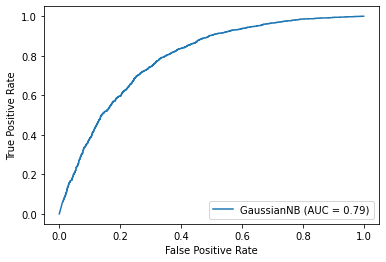

Accuracy  :  0.716
Recall  :  0.7160780643122573
F1Score  :  0.7155979237206394
ConfusionMatrix  : 


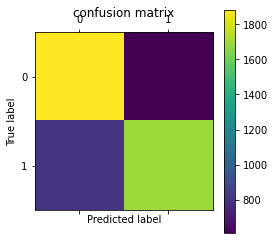

*************************************************************************************
BOW  with  SVM_RBF  classifier is returned this result: 
ROC  : 


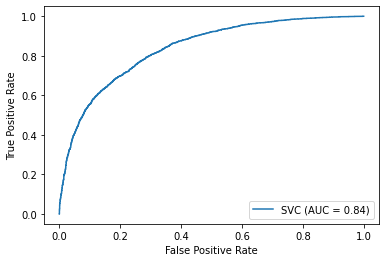

Accuracy  :  0.7524
Recall  :  0.7523302093208373
F1Score  :  0.7520715046608153
ConfusionMatrix  : 


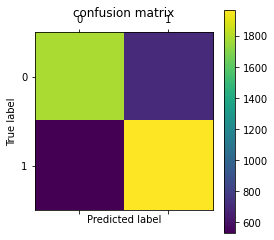

*************************************************************************************
BOW  with  SVM_linear  classifier is returned this result: 
ROC  : 


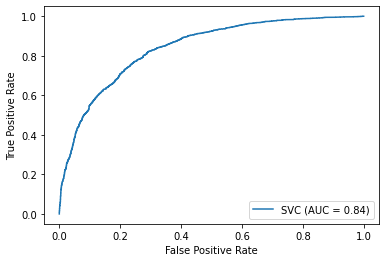

Accuracy  :  0.7596
Recall  :  0.7595478381913527
F1Score  :  0.7594167332907515
ConfusionMatrix  : 


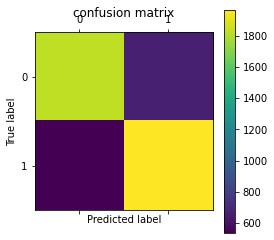

100%|██████████| 405M/405M [00:22<00:00, 17.9MB/s]


*************************************************************************************
BERT_Embeding  with  NaiveBayes  classifier is returned this result: 
ROC  : 


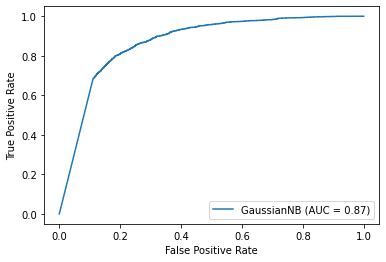

Accuracy  :  0.8058
Recall  :  0.8058412233648935
F1Score  :  0.8057298684825223
ConfusionMatrix  : 


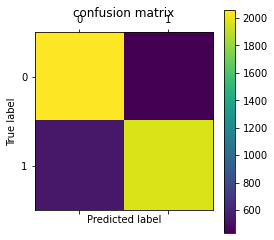

*************************************************************************************
BERT_Embeding  with  SVM_RBF  classifier is returned this result: 
ROC  : 


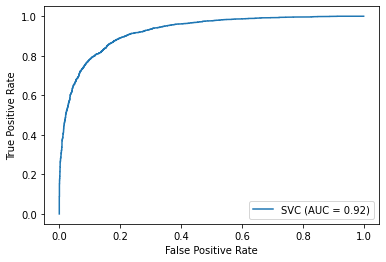

Accuracy  :  0.8468
Recall  :  0.8467929871719487
F1Score  :  0.8467958573599831
ConfusionMatrix  : 


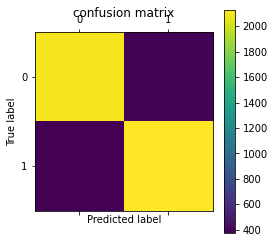

*************************************************************************************
BERT_Embeding  with  SVM_linear  classifier is returned this result: 
ROC  : 


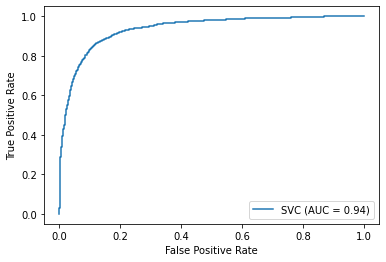

Accuracy  :  0.869
Recall  :  0.868998275993104
F1Score  :  0.8689991144340137
ConfusionMatrix  : 


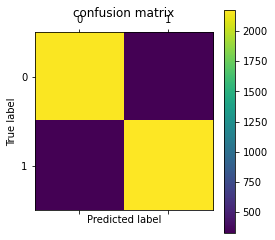

['10', 'acting', 'action', 'actors', 'actually', 'almost', 'also', 'although', 'always', 'another', 'anyone', 'anything', 'around', 'away', 'back', 'bad', 'best', 'better', 'big', 'bit', 'cast', 'character', 'characters', 'come', 'comedy', 'could', 'course', 'day', 'director', 'done', 'dvd', 'end', 'enough', 'especially', 'even', 'ever', 'every', 'fact', 'family', 'far', 'feel', 'film', 'films', 'find', 'first', 'found', 'fun', 'funny', 'get', 'gets', 'girl', 'give', 'go', 'going', 'good', 'got', 'great', 'guy', 'horror', 'however', 'interesting', 'isa', 'it', 'kind', 'know', 'last', 'least', 'life', 'like', 'little', 'long', 'look', 'lot', 'love', 'made', 'make', 'makes', 'making', 'man', 'many', 'may', 'might', 'movie', 'movies', 'much', 'music', 'must', 'never', 'new', 'nothing', 'old', 'one', 'original', 'part', 'people', 'performance', 'played', 'plot', 'point', 'pretty', 'probably', 'quite', 'rather', 'real', 'really', 'right', 'role', 'saw', 'say', 'scene', 'scenes', 'screen', '

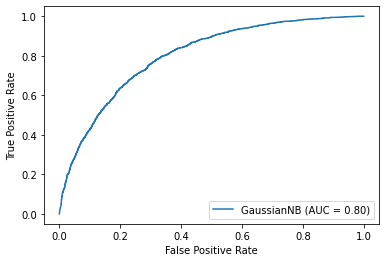

Accuracy  :  0.728
Recall  :  0.7279629118516474
F1Score  :  0.7278911564625851
ConfusionMatrix  : 


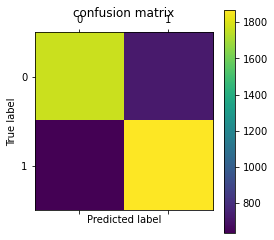

*************************************************************************************
Tfidf  with  SVM_RBF  classifier is returned this result: 
ROC  : 


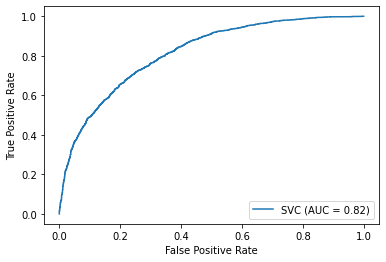

Accuracy  :  0.7274
Recall  :  0.7272225088900356
F1Score  :  0.7251639226814935
ConfusionMatrix  : 


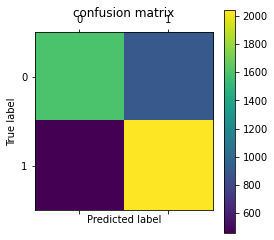

*************************************************************************************
Tfidf  with  SVM_linear  classifier is returned this result: 
ROC  : 


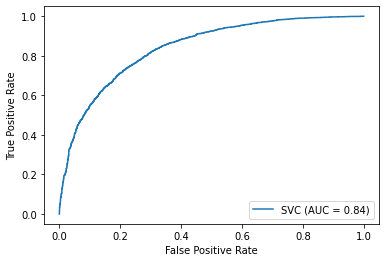

Accuracy  :  0.7578
Recall  :  0.7577690310761243
F1Score  :  0.757729983965366
ConfusionMatrix  : 


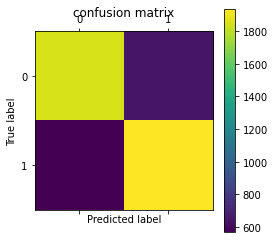

In [ ]:
for vector_name,vector in zip(Vector_extraction_methods_name , Vector_extraction_methods):
  vector_train , vector_test = vector(text_train,text_test)
  for classifier_name,classifier in zip(Classifier_method_name,Classifier_method):
    print("*************************************************************************************")
    print(vector_name," with " ,classifier_name," classifier is returned this result: ")
    print(evaluation_method_name[5]," : ")

    lable_pred = classifier(vector_train,lable_train,vector_test,lable_test)

    score = evaluation_method[1](lable_test,lable_pred)
    print(evaluation_method_name[1]," : ",score)

    recall = evaluation_method[2](lable_test,lable_pred)
    print(evaluation_method_name[2]," : ",recall)

    f1score = evaluation_method[3](lable_test,lable_pred)
    print(evaluation_method_name[3]," : ",f1score)

    print(evaluation_method_name[4]," : ")
    evaluation_method[4](lable_test,lable_pred)


In [ ]:
text_train = csvfile_read('Train.csv')
text_train ,lable_train= preprocessing(text_train)
print("finish preprocessing train")

In [ ]:
text_valid = csvfile_read('Valid.csv')
text_valid ,lable_valid= preprocessing(text_valid)
print ("finish preprocessing Valid")

In [ ]:
text_train = text_train + text_valid
lable_train = lable_train + lable_valid

In [ ]:
text_test = csvfile_read('Test.csv')
text_test ,lable_test= preprocessing(text_test)
print ("finish preprocessing Test")

In [ ]:
evaluation_method_name = ['AUC','Accuracy','Recall','F1Score','ConfusionMatrix','ROC']
evaluation_method = [AUC , Accuracy , Recall , F1Score,ConfusionMatrix , ROC ]

Classifier_method_name = ['NaiveBayes','SVM_RBF','SVM_linear']
Classifier_method = [NaiveBayes,SVM_RBF,SVM_linear]

Vector_extraction_methods_name = ['BOW','BERT_Embeding','Tfidf']
Vector_extraction_methods = [BOW ,BERT_Embeding,Tfidf]

*************************************************************************************
BOW  with  NaiveBayes  classifier is returned this result: 
ROC  : 


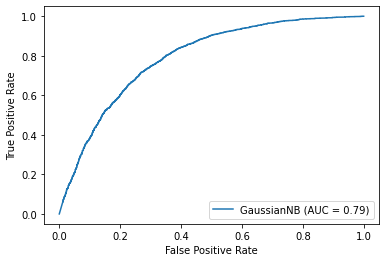

Accuracy  :  0.715
Recall  :  0.7150776603106412
F1Score  :  0.7146007950080253
ConfusionMatrix  : 


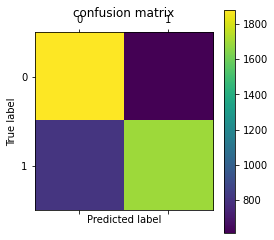

*************************************************************************************
BOW  with  SVM_RBF  classifier is returned this result: 
ROC  : 


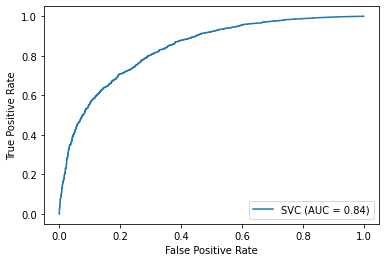

Accuracy  :  0.7532
Recall  :  0.7531358125432501
F1Score  :  0.7529210577573658
ConfusionMatrix  : 


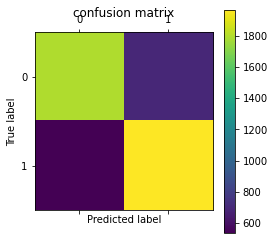

*************************************************************************************
BOW  with  SVM_linear  classifier is returned this result: 
ROC  : 


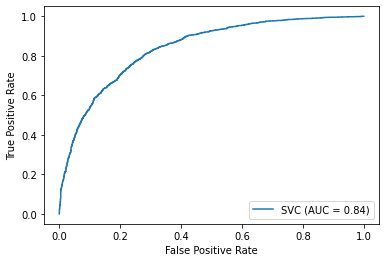

Accuracy  :  0.7596
Recall  :  0.7595422381689527
F1Score  :  0.7593776264272389
ConfusionMatrix  : 


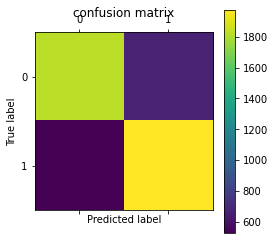

100%|██████████| 405M/405M [00:14<00:00, 28.2MB/s]


*************************************************************************************
BERT_Embeding  with  NaiveBayes  classifier is returned this result: 
ROC  : 


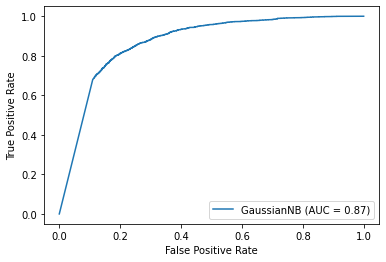

Accuracy  :  0.8048
Recall  :  0.8048456193824776
F1Score  :  0.8047122298645903
ConfusionMatrix  : 


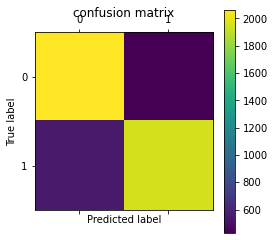

*************************************************************************************
BERT_Embeding  with  SVM_RBF  classifier is returned this result: 
ROC  : 


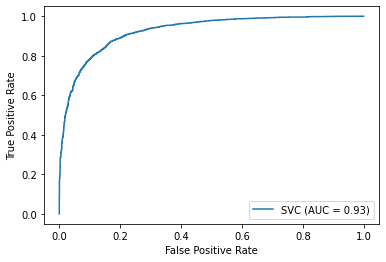

Accuracy  :  0.8482
Recall  :  0.848191792767171
F1Score  :  0.8481948932762098
ConfusionMatrix  : 


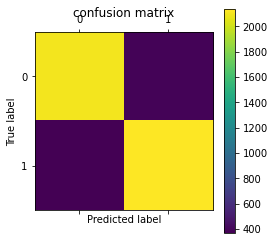

*************************************************************************************
BERT_Embeding  with  SVM_linear  classifier is returned this result: 
ROC  : 


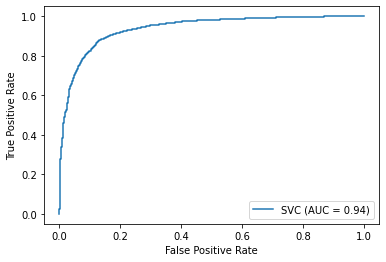

Accuracy  :  0.8736
Recall  :  0.8735962943851776
F1Score  :  0.8735983618347694
ConfusionMatrix  : 


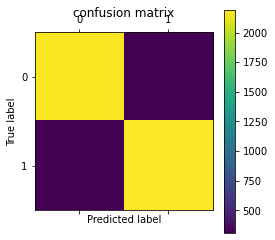

['10', 'acting', 'action', 'actors', 'actually', 'almost', 'also', 'although', 'always', 'another', 'anyone', 'anything', 'around', 'away', 'back', 'bad', 'best', 'better', 'big', 'bit', 'cast', 'character', 'characters', 'come', 'comedy', 'could', 'course', 'day', 'director', 'done', 'dvd', 'end', 'enough', 'especially', 'even', 'ever', 'every', 'fact', 'family', 'far', 'feel', 'film', 'films', 'find', 'first', 'found', 'fun', 'funny', 'get', 'gets', 'girl', 'give', 'go', 'going', 'good', 'got', 'great', 'guy', 'horror', 'however', 'interesting', 'isa', 'it', 'kind', 'know', 'last', 'least', 'life', 'like', 'little', 'long', 'look', 'lot', 'love', 'made', 'make', 'makes', 'making', 'man', 'many', 'may', 'might', 'movie', 'movies', 'much', 'music', 'must', 'never', 'new', 'nothing', 'old', 'one', 'original', 'part', 'people', 'performance', 'played', 'plot', 'point', 'pretty', 'probably', 'quite', 'rather', 'real', 'really', 'right', 'role', 'saw', 'say', 'scene', 'scenes', 'screen', '

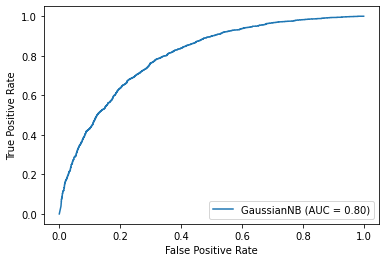

Accuracy  :  0.7274
Recall  :  0.7273585094340378
F1Score  :  0.7272655855711929
ConfusionMatrix  : 


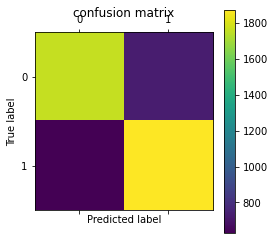

*************************************************************************************
Tfidf  with  SVM_RBF  classifier is returned this result: 
ROC  : 


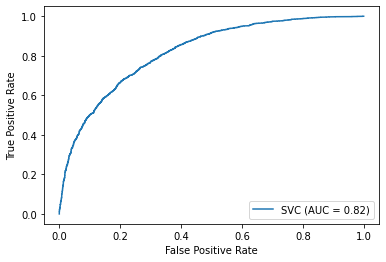

Accuracy  :  0.7322
Recall  :  0.7320393281573127
F1Score  :  0.7303960150316202
ConfusionMatrix  : 


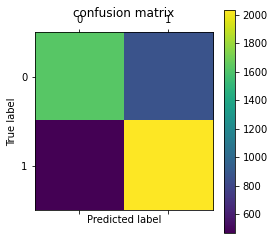

*************************************************************************************
Tfidf  with  SVM_linear  classifier is returned this result: 
ROC  : 


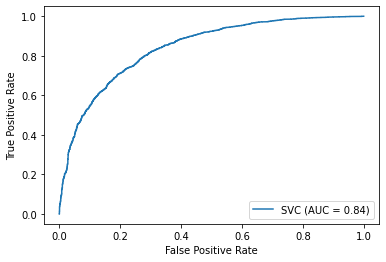

Accuracy  :  0.7584
Recall  :  0.7583574334297337
F1Score  :  0.7582743413335988
ConfusionMatrix  : 


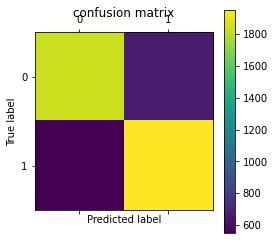

In [ ]:
for vector_name,vector in zip(Vector_extraction_methods_name , Vector_extraction_methods):
  vector_train , vector_test = vector(text_train,text_test)
  for classifier_name,classifier in zip(Classifier_method_name,Classifier_method):
    print("*************************************************************************************")
    print(vector_name," with " ,classifier_name," classifier is returned this result: ")
    print(evaluation_method_name[5]," : ")
    
    lable_pred = classifier(vector_train,lable_train,vector_test,lable_test)

    score = evaluation_method[1](lable_test,lable_pred)
    print(evaluation_method_name[1]," : ",score)

    recall = evaluation_method[2](lable_test,lable_pred)
    print(evaluation_method_name[2]," : ",recall)

    f1score = evaluation_method[3](lable_test,lable_pred)
    print(evaluation_method_name[3]," : ",f1score)

    print(evaluation_method_name[4]," : ")
    evaluation_method[4](lable_test,lable_pred)
